In [71]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [72]:
# Logistic Regression implementation on Breast Cancer dataset considering the less number of features

In [73]:
cancer = load_breast_cancer()
X = cancer.data[:,0:3] # Using only first 3 features.
y = cancer.target

In [74]:
X

array([[ 17.99,  10.38, 122.8 ],
       [ 20.57,  17.77, 132.9 ],
       [ 19.69,  21.25, 130.  ],
       ...,
       [ 16.6 ,  28.08, 108.3 ],
       [ 20.6 ,  29.33, 140.1 ],
       [  7.76,  24.54,  47.92]])

In [75]:
m = np.shape(X)[0]
n = np.shape(X)[1]

In [76]:
print (m, n)

569 3


In [77]:
X = (X - X.min()) / (X.max() - X.min())

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(483, 3) (483,) (86, 3) (86,)


In [79]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [80]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [81]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3, 483) (483,) (3, 86) (86,)


In [82]:
def init_theta(features):
    theta = np.zeros([features, 1])
    theta0 = 0.0
    return theta, theta0

In [83]:
def sigmoid(z):
    h = 1 / (1 + np.exp(-z))
    return h

In [84]:
def forward_propagation(theta, theta0, X_train, y_train):
    z = np.dot(theta.T, X_train) + theta0
    h = sigmoid(z)
    n = X_train.shape[1]
    cost = - y_train * np.log(h) - (1 - y_train) * np.log(1 - h)
    cost = (np.sum(cost)) / n
    # backward propagation
    derivative_weight = (np.dot(X_train, ((h - y_train).T))) / n 
    derivative_bias = np.sum(h - y_train) / n
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [85]:
def update(theta, theta0, X_train, y_train, alpha, epochs):
    cost_list = []
    cost_list_tenth = [] # tracking tenth cost
    index = []
    
    for i in range(epochs):
        cost, gradients = forward_propagation(theta, theta0, X_train, y_train)
        cost_list.append(cost)
        
        theta = theta - alpha * gradients["derivative_weight"]
        theta0 = theta0 - alpha * gradients["derivative_bias"]
        #print ("Thetas : {}".format(theta)) 
        
        if i % 10 == 0:
            cost_list_tenth.append(cost)
            index.append(i)
            #print ("Cost after epochs % i: % f" %(i, cost)) 
            
    parameters = {"weight": theta, "bias": theta0}
    # h = theta * X + theta0
    plt.plot(index, cost_list_tenth)
        
    return parameters, gradients, cost_list

In [86]:
def predict(theta, theta0, X_test):
    z = sigmoid(np.dot(theta.T, X_test) + theta0)
    y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    
    return y_prediction

In [87]:
def logistic_regression(X_train, y_train, X_test, y_test, alpha, epochs):
    m = X_train.shape[0]
    theta, theta0 = init_theta(m)
    
    parameters, gradients, cost_list = update(theta, theta0, X_train, y_train, alpha, epochs)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], X_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], X_train)
    
    print ("Train accuracy: {:.2f}%".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print ("Test accuracy: {:.2f}%".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Train accuracy: 88.41%
Test accuracy: 94.19%


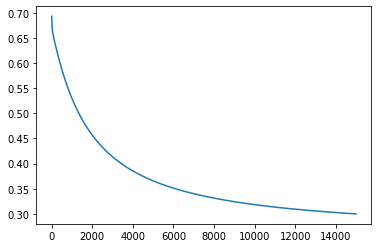

In [88]:
logistic_regression(X_train, y_train, X_test, y_test, alpha = 0.1, epochs = 15000)

In [89]:
# Logistic Regression implementation on some dataset with multiclass problem
# Using wine quality dataset - white wine 
# http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [90]:
wine = pd.read_csv('winequality-white.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [91]:
X = wine.drop('quality', 1).values
X = (X - X.min()) / (X.max() - X.min())
X

array([[0.01590909, 0.00061364, 0.00081818, ..., 0.00681818, 0.00102273,
        0.02      ],
       [0.01431818, 0.00068182, 0.00077273, ..., 0.0075    , 0.00111364,
        0.02159091],
       [0.01840909, 0.00063636, 0.00090909, ..., 0.00740909, 0.001     ,
        0.02295455],
       ...,
       [0.01477273, 0.00054545, 0.00043182, ..., 0.00679545, 0.00104545,
        0.02136364],
       [0.0125    , 0.00065909, 0.00068182, ..., 0.00759091, 0.00086364,
        0.02909091],
       [0.01363636, 0.00047727, 0.00086364, ..., 0.00740909, 0.00072727,
        0.02681818]])

In [92]:
y = wine['quality'].values
y = (y == 6) * 1 # quality of 6 (1) vs all (0)
y

array([1, 1, 1, ..., 1, 0, 1])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3918, 11) (3918,) (980, 11) (980,)


In [94]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [95]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11, 3918) (3918,) (11, 980) (980,)


Train accuracy: 54.93%
Test accuracy: 55.92%


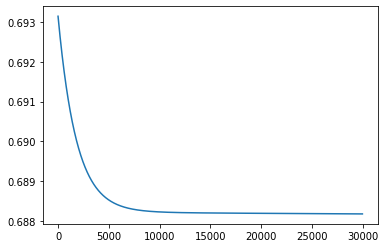

In [96]:
logistic_regression(X_train, y_train, X_test, y_test, alpha = 0.001, epochs = 30000)